Crime Data:
    Row= parishes
    Column= Month - Year

In [1]:
import pandas as pd


# Read the CSV file into a DataFrame
crime_Data = pd.read_csv('data/Crime Data Month Year.csv')
crime_Data.head()


,Parish,Jan-15,Feb-15,Mar-15,Apr-15,May-15,Jun-15,Jul-15,Aug-15,Sep-15,...,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
0,Catahoula,15,13,11.0,18,5,10.0,13.0,27,13.0,...,5.0,8.0,4.0,6.0,7.0,12.0,3.0,9.0,11.0,8.0
1,Claiborne,16,11,17.0,26,22,16.0,22.0,24,NaN,...,5.0,10.0,7.0,3.0,6.0,9.0,11.0,11.0,4.0,4.0
2,Concordia,66,63,51.0,52,50,80.0,68.0,79,55.0,...,23.0,24.0,20.0,39.0,26.0,34.0,6.0,7.0,7.0,NaN
3,DE SOTO,54,44,43.0,75,84,55.0,58.0,71,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,East Baton Rouge,1708,1245,1564.0,1729,1837,1799.0,1917.0,2123,1824.0,...,516.0,478.0,474.0,522.0,518.0,472.0,529.0,510.0,545.0,73.0


School Data:



In [2]:
import os
import pandas as pd

columns = [2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]

parishes = [
    "Acadia", "Allen", "Ascension", "Assumption", "Avoyelles", "Beauregard", "Bienville", "Bossier",
    "Caddo", "Calcasieu", "Caldwell", "Cameron", "Catahoula", "Claiborne", "Concordia", "DeSoto",
    "East Baton Rouge", "East Carroll", "East Feliciana", "Evangeline", "Franklin", "Grant", "Iberia",
    "Iberville", "Jackson", "Jefferson", "Jefferson Davis", "Lafayette", "Lafourche", "LaSalle",
    "Lincoln", "Livingston", "Madison", "Morehouse", "Natchitoches", "Orleans", "Ouachita",
    "Plaquemines", "Pointe Coupee", "Rapides", "Red River", "Richland", "Sabine", "St. Bernard",
    "St. Charles", "St. Helena", "St. James", "St. John the Baptist", "St. Landry", "St. Martin",
    "St. Mary", "St. Tammany", "Tangipahoa", "Tensas", "Terrebonne", "Union", "Vermilion", "Vernon",
    "Washington", "Webster", "West Baton Rouge", "West Carroll", "West Feliciana", "Winn"
]

folder_path = "data/School Data Year"

# Create empyty DF with column for years and rows as parishes
school_data = pd.DataFrame(index=parishes, columns=columns)

# Sort file names so years are consistent
items_in_folder = sorted(os.listdir(folder_path))

for item_name in items_in_folder:
    item_full_path = os.path.join(folder_path, item_name)

    if os.path.isfile(item_full_path):

        try:
            year = int("".join(filter(str.isdigit, item_name))[:4])
            if year not in school_data.columns:
                print(f"⚠️ {item_name} skipped — year {year} not in template")
            else:
                df = pd.read_excel(item_full_path)
                # Only waNT THE COLUMN NAMED DPS AND THE ROWS 2 AND 64
                schoolfiltered = df.loc[0:63,"DPS"]

                # add the grade number to the appropriate year column
                school_data[year] = schoolfiltered.values

        except Exception as e:
            print(f"Error reading {item_name}: {e}")

school_data.head()

C:\Users\fresh\miniconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\fresh\miniconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,2014,2015,2016,2017,2018,2019,2021,2022,2023,2024
Acadia,89.7,87.0,97.3,90.0,79.5,81.0,81.0,77.1,81.2,80.0
Allen,98.3,98.5,104.2,103.4,85.1,86.6,86.6,84.5,84.8,88.3
Ascension,106.9,107.4,109.3,110.4,91.2,92.3,92.3,92.0,93.7,95.8
Assumption,89.4,91.6,93.3,95.0,78.9,80.5,80.5,78.7,80.6,81.8
Avoyelles,72.9,61.5,73.6,71.5,66.6,71.7,71.7,78.5,77.7,79.1


Home Mortgage Rates:



In [3]:
HomeRatesUnfiltered = pd.read_excel("data/Home Mortgage Rates.xlsx")
HomeRatesUnfiltered["observation_date"] = pd.to_datetime(HomeRatesUnfiltered["observation_date"])

# Resample first (needs datetime index)
HomeRates_Data = (
    HomeRatesUnfiltered
        .set_index("observation_date")
        .resample("M")["MORTGAGE30US"]
        .mean()
)

# Convert end-of-month dates to YYYY-MM
HomeRates_Data.index = HomeRates_Data.index.to_period("M").astype(str)
HomeRates_Data = HomeRates_Data.to_frame().T

HomeRates_Data.head()


C:\Users\fresh\AppData\Local\Temp\ipykernel_28640\1185758023.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["MORTGAGE30US"]


observation_date,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
MORTGAGE30US,4.432,4.3025,4.3425,4.3375,4.192,4.1625,4.13,4.115,4.1625,4.036,...,6.8425,6.65,6.725,6.816,6.8175,6.72,6.5875,6.3525,6.254,6.23


Home Values:

In [4]:
HomeValuesUnfilterd = pd.read_csv("data/Home Values Month Year.csv")
HomeValuesUnfilterd["RegionName"] = HomeValuesUnfilterd["RegionName"].str.replace(" Parish", "", regex=False)
HomeValuesUnfilterd = HomeValuesUnfilterd.set_index("RegionName")
HomeValues_Data = HomeValuesUnfilterd.drop(columns=["SizeRank"])

HomeValues_Data.head()





,Jan-00,Feb-00,Mar-00,Apr-00,May-00,Jun-00,Jul-00,Aug-00,Sep-00,Oct-00,...,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
RegionName,,,,,,,,,,,,,,,,,,,,,
East Baton Rouge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232684.485748,232994.279651,232535.091943,231765.383062,231555.700747,231189.966035,230481.867855,229203.888988,228155.265514,227700.100000
Jefferson,177685.116025,177506.932739,177385.050007,177552.147251,178230.031288,178524.211742,178434.676084,178227.003249,178562.049517,179768.164979,...,252740.518966,251592.557576,251090.808246,250284.419563,250230.508089,251304.382917,253233.975326,256094.149655,258570.139040,261029.195074
Orleans,114457.315138,114463.084020,114609.612186,114925.857799,115379.142598,116112.375793,116788.601812,117497.558926,118159.671062,118945.654202,...,245288.312613,244684.625332,243340.799847,242208.428409,241274.929752,240797.041239,240617.099757,240693.788453,240126.687346,239059.044304
Saint Tammany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,278796.795443,279398.260949,279706.231973,280329.693073,280834.972401,280806.851946,280111.238384,279085.095805,278179.867160,277339.750408
Lafayette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,231842.569211,231809.998417,231165.701590,230510.798849,229994.968306,230106.991656,230185.820386,230211.037006,230373.184769,230968.706349


Median Household Income:

In [5]:
import os
import pandas as pd

def simplify(col):
    if not isinstance(col, str):
        return col
    if col in ["GEO_ID", "NAME", "Geographic Area Name"]:
        return col

    parts = col.split("!!")
    last = parts[-1].strip()
    last = (last.replace("(", "")
                .replace(")", "")
                .replace(",", "")
                .replace("--", "_")
                .replace(" ", "_"))
    return last

folder_path = "data/Median Household Income"
columns = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

MedianHouseIncome_Data = {}

items_in_folder = sorted(os.listdir(folder_path))

for item_name in items_in_folder:
    item_full_path = os.path.join(folder_path, item_name)

    try:
        # Year
        year = int("".join(filter(str.isdigit, item_name))[:4])
        if year not in columns:
            continue

        # Load entire CSV raw
        df_raw = pd.read_csv(item_full_path, header=None)

        # Detect header row → row containing "!!"
        header_row_index = df_raw.apply(lambda row: row.astype(str).str.contains("!!").any(), axis=1).idxmax()

        # Set header
        df_raw.columns = df_raw.iloc[header_row_index]

        # Drop all rows up to header row
        df = df_raw.drop(index=list(range(header_row_index+1)))

        df = df.reset_index(drop=True)

        # Drop GEO_ID column (first column always)
        df = df.drop(columns=df.columns[0])

        # Drop MOE columns
        df = df.drop(columns=df.filter(regex="Margin of Error").columns)

        # Clean NAME column (which is now correctly labeled)
        name_col = df.columns[0]
        df[name_col] = df[name_col].str.replace(", Louisiana", "", regex=False)
        df[name_col] = df[name_col].str.replace(" Parish", "", regex=False)

        # Set index
        df = df.set_index(name_col)

        # Simplify column names
        df.columns = [simplify(col) for col in df.columns]

        # Reindex by parish list
        df = df.reindex(parishes)

        # Store
        MedianHouseIncome_Data[year] = df

    except Exception as e:
        print(f"Error reading {item_name}: {e}")




{2014:                      Households Households White  White  \
Geographic Area Name                                      
Acadia                    22788      37684  81.4  42665   
Allen                      8108      39440  81.5  41630   
Ascension                 39447      70207  76.0  74878   
Assumption                 8726      47961  72.2  55934   
Avoyelles                 15107      33781  74.5  38227   
...                         ...        ...   ...    ...   
Webster                   15831      35292  64.9  45805   
West Baton Rouge           9030      49202  62.9  65161   
West Carroll               4216      31843  87.4  35620   
West Feliciana             3976      53967  61.6  83623   
Winn                       5371      32608  72.4  40655   

                     Black_or_African_American Black_or_African_American  \
Geographic Area Name                                                       
Acadia                                    17.0                     21150 

HOme Bedroom Values


In [7]:
import os
import pandas as pd

folder_path = "data/Home Values Roomes"   # <-- your folder

# List of Louisiana parishes (cleaned)
parishes = [
    "Acadia", "Allen", "Ascension", "Assumption", "Avoyelles", "Beauregard",
    "Bienville", "Bossier", "Caddo", "Calcasieu", "Caldwell", "Cameron",
    "Catahoula", "Claiborne", "Concordia", "DeSoto", "East Baton Rouge",
    "East Carroll", "East Feliciana", "Evangeline", "Franklin", "Grant",
    "Iberia", "Iberville", "Jackson", "Jefferson", "Jefferson Davis",
    "Lafayette", "Lafourche", "LaSalle", "Lincoln", "Livingston", "Madison",
    "Morehouse", "Natchitoches", "Orleans", "Ouachita", "Plaquemines",
    "Pointe Coupee", "Rapides", "Red River", "Richland", "Sabine",
    "St. Bernard", "St. Charles", "St. Helena", "St. James",
    "St. John the Baptist", "St. Landry", "St. Martin", "St. Mary",
    "St. Tammany", "Tangipahoa", "Tensas", "Terrebonne", "Union",
    "Vermilion", "Vernon", "Washington", "Webster", "West Baton Rouge",
    "West Carroll", "West Feliciana", "Winn"
]

# MASTER DATA STORAGE
HomeValues_LA = {}

# Loop through every file
for filename in sorted(os.listdir(folder_path)):
    if not filename.endswith(".csv"):
        continue

    filepath = os.path.join(folder_path, filename)
    print("Loading:", filename)

    df = pd.read_csv(filepath)

    # Clean region names
    df["RegionName"] = df["RegionName"].str.replace(" Parish", "", regex=False)
    df["RegionName"] = df["RegionName"].str.replace(" County", "", regex=False)

    # Filter to Louisiana
    df_LA = df[(df["StateName"] == "LA") & (df["RegionType"] == "county")]

    # Extra filter to ensure only valid parishes remain
    df_LA = df_LA[df_LA["RegionName"].isin(parishes)]

    # Drop metadata columns to keep only date columns
    metadata_cols = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName",
                     "State", "Metro", "StateCodeFIPS", "MunicipalCodeFIPS"]
    date_cols = [col for col in df_LA.columns if col not in metadata_cols]

    # Store cleaned dataframe
    HomeValues_LA[filename] = df_LA.set_index("RegionName")[date_cols]

print("Loaded Louisiana home values for:", len(HomeValues_LA), "files")




Loading: 1Bd.csv
Loading: 2Bd.csv
Loading: 3Bd.csv
Loading: 4Bd.csv
Loading: 5Bd.csv
Loaded Louisiana home values for: 5 files


Combine Data


In [9]:
# Combine Data (Monthly, Bedroom-Aware)


import itertools

# --- 1. MONTHLY BEDROOM HOME VALUES ---

monthly_bedroom_dfs = []

for filename, df in HomeValues_LA.items():
    # Extract number of bedrooms from filename (e.g., "3Bd.csv" → 3)
    bedrooms = int(filename.replace("Bd.csv", ""))

    temp = df.copy()
    temp.index.name = "Parish"

    # Melt monthly columns
    temp = temp.reset_index().melt(
        id_vars="Parish",
        var_name="MonthYear",
        value_name="HomeValue"
    )

    # Convert MonthYear to datetime
    temp["MonthYear"] = pd.to_datetime(temp["MonthYear"], errors="coerce")
    temp = temp.dropna(subset=["MonthYear"])

    temp["Year"] = temp["MonthYear"].dt.year
    temp["Month"] = temp["MonthYear"].dt.month
    temp["Bedrooms"] = bedrooms

    monthly_bedroom_dfs.append(temp)

# All bedrooms together
homes_monthly = pd.concat(monthly_bedroom_dfs, ignore_index=True)

# --- 2. CRIME MONTHLY ---

crime = crime_Data.copy()

if crime.columns[0] == "":
    crime = crime.drop(columns=crime.columns[0])

crime_long = crime.melt(
    id_vars="Parish",
    var_name="MonthYear",
    value_name="CrimeRate"
)

crime_long["MonthYear"] = pd.to_datetime(crime_long["MonthYear"], format="%b-%y")
crime_long["Year"] = crime_long["MonthYear"].dt.year
crime_long["Month"] = crime_long["MonthYear"].dt.month

crime_monthly = crime_long.dropna(subset=["MonthYear"])

# --- 3. SCHOOL YEARLY → MONTHLY ---

school_yearly = school_data.copy()
school_yearly["Parish"] = school_yearly.index

school_long = school_yearly.melt(
    id_vars="Parish",
    var_name="Year",
    value_name="School"
)
school_long["Year"] = school_long["Year"].astype(int)

# Repeat each year 12 times (months 1–12)
school_monthly = school_long.loc[school_long.index.repeat(12)].copy()
school_monthly["Month"] = list(range(1, 13)) * (len(school_monthly) // 12)

# --- 4. INCOME YEARLY → MONTHLY ---

income_frames = []

for year, df in MedianHouseIncome_Data.items():
    temp = df.reset_index()
    temp = temp.iloc[:, :2]  # Parish + value
    temp.columns = ["Parish", "Income"]
    temp["Year"] = year

    # Repeat rows for 12 months
    temp = temp.loc[temp.index.repeat(12)].copy()
    temp["Month"] = list(range(1, 13)) * (len(temp) // 12)

    income_frames.append(temp)

income_monthly = pd.concat(income_frames, ignore_index=True)

# --- 5. MORTGAGE MONTHLY ---

mort = HomeRatesUnfiltered.copy()
mort["MonthYear"] = pd.to_datetime(mort["observation_date"])
mort["Year"] = mort["MonthYear"].dt.year
mort["Month"] = mort["MonthYear"].dt.month
mort = mort.rename(columns={"MORTGAGE30US": "MortgageRate"})
mort = mort[["Year", "Month", "MortgageRate"]]

# --- 6. BUILD MASTER MONTHLY DATASET ---

# Start with bedroom-level monthly home values
master_monthly = homes_monthly.copy()

# Merge Crime
master_monthly = master_monthly.merge(
    crime_monthly[["Parish", "Year", "Month", "CrimeRate"]],
    on=["Parish", "Year", "Month"],
    how="left"
)

# Merge School
master_monthly = master_monthly.merge(
    school_monthly[["Parish", "Year", "Month", "School"]],
    on=["Parish", "Year", "Month"],
    how="left"
)

# Merge Income
master_monthly = master_monthly.merge(
    income_monthly[["Parish", "Year", "Month", "Income"]],
    on=["Parish", "Year", "Month"],
    how="left"
)

# Merge Mortgage
master_monthly = master_monthly.merge(
    mort,
    on=["Year", "Month"],
    how="left"
)

print("Master monthly shape:", master_monthly.shape)
master_monthly.head()


Master monthly shape: (96678, 10)


,Parish,MonthYear,HomeValue,Year,Month,Bedrooms,CrimeRate,School,Income,MortgageRate
0,East Baton Rouge,2000-01-31,NaN,2000,1,1,NaN,NaN,NaN,NaN
1,Jefferson,2000-01-31,NaN,2000,1,1,NaN,NaN,NaN,NaN
2,Orleans,2000-01-31,81581.087712,2000,1,1,NaN,NaN,NaN,NaN
3,Lafayette,2000-01-31,NaN,2000,1,1,NaN,NaN,NaN,NaN
4,Caddo,2000-01-31,NaN,2000,1,1,NaN,NaN,NaN,NaN


Ridding of Naan

In [10]:
# Ridding of NaN

num_cols = ["HomeValue", "CrimeRate", "School", "Income", "MortgageRate"]

# Ensure numeric
for col in num_cols:
    master_monthly[col] = pd.to_numeric(master_monthly[col], errors="coerce")

# Sort for nice grouping
master_monthly = master_monthly.sort_values(["Parish", "Bedrooms", "Year", "Month"])

# 1) Fill CrimeRate missing with statewide-year average
state_year_crime = (
    master_monthly.groupby("Year")["CrimeRate"].mean()
)


def fill_crime(row):
    if pd.isna(row["CrimeRate"]):
        return state_year_crime.get(row["Year"], row["CrimeRate"])
    return row["CrimeRate"]


master_monthly["CrimeRate"] = master_monthly.apply(fill_crime, axis=1)

# 2) Interpolate by Parish for CrimeRate, School, Income
for col in ["CrimeRate", "School", "Income"]:
    master_monthly[col] = (
        master_monthly
        .groupby("Parish")[col]
        .transform(lambda s: s.interpolate().bfill().ffill())
    )

# 3) MortgageRate interpolate globally
master_monthly["MortgageRate"] = (
    master_monthly["MortgageRate"]
    .interpolate()
    .bfill()
    .ffill()
)

print("NaNs before dropping HomeValue:")
print(master_monthly.isna().sum())

# Drop rows without HomeValue (we can't train without target)
master_monthly = master_monthly.dropna(subset=["HomeValue"])

print("NaNs after cleaning:")
print(master_monthly.isna().sum())

import os

os.makedirs("data/processed", exist_ok=True)

master_monthly.to_csv("data/processed/master_dataset_monthly.csv", index=False)
print("Saved to data/processed/master_dataset_monthly.csv")


NaNs before dropping HomeValue:
Parish              0
MonthYear           0
HomeValue       17276
Year                0
Month               0
Bedrooms            0
CrimeRate           0
School              0
Income              0
MortgageRate        0
dtype: int64
NaNs after cleaning:
Parish          0
MonthYear       0
HomeValue       0
Year            0
Month           0
Bedrooms        0
CrimeRate       0
School          0
Income          0
MortgageRate    0
dtype: int64
Saved to data/processed/master_dataset_monthly.csv


PHASE ONE LSMT


Final all_data shape: (79402, 11)
Total sequences: (77926, 12, 6) (77926,)
Epoch  20 | Train 0.034066 | Test 0.023029
Epoch  40 | Train 0.008831 | Test 0.006807
Epoch  60 | Train 0.003751 | Test 0.003406
Epoch  80 | Train 0.002877 | Test 0.002327
Epoch 100 | Train 0.001987 | Test 0.001428
Epoch 120 | Train 0.001067 | Test 0.000540


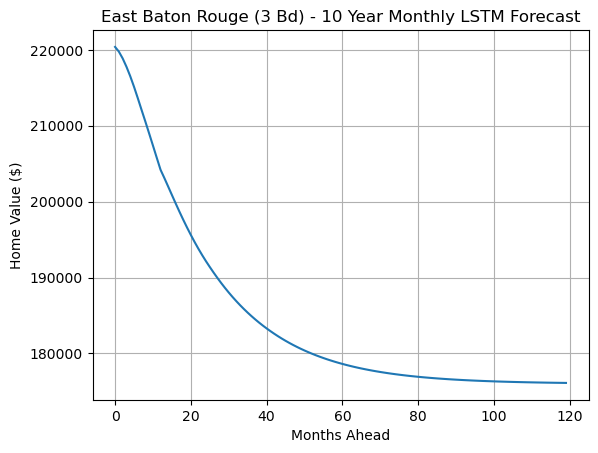

In [12]:
# PHASE ONE LSTM (Monthly, Parish + Bedrooms)

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt

# If running in a fresh session, uncomment this:
# master_monthly = pd.read_csv("data/processed/master_dataset_monthly.csv")


# --- 1. Prepare ALL DATA for LSTM ---

# Make names consistent / lower_snake_case for modeling
all_data = master_monthly.rename(columns={
    "Parish": "parish",
    "Bedrooms": "bedrooms",
    "HomeValue": "home_value",
    "CrimeRate": "crime",
    "School": "school_rating",
    "Income": "median_income",
    "MortgageRate": "mortgage_rate",
})

# Create a real datetime column (not required, but nice for plotting)
all_data["date"] = pd.to_datetime(dict(year=all_data["Year"], month=all_data["Month"], day=1))

# Sort in time order per parish+bedrooms
all_data = all_data.sort_values(["parish", "bedrooms", "Year", "Month"]).reset_index(drop=True)


all_data["t"] = np.arange(len(all_data))

all_data["month_sin"] = np.sin(2 * np.pi * all_data["Month"] / 12)
all_data["month_cos"] = np.cos(2 * np.pi * all_data["Month"] / 12)

print("Final all_data shape:", all_data.shape)

# Feature columns for the model
feature_cols = [
    "home_value",
    "mortgage_rate",
    "school_rating",
    "median_income",
    "crime",
    "bedrooms",
    "t",
    "month_sin",
    "month_cos"
]

# Ensure no NaNs in features
all_data = all_data.dropna(subset=feature_cols).reset_index(drop=True)

SEQ_LEN = 36 # 1 year of monthly history

# Global scaler
scaler = StandardScaler()
scaler.fit(all_data[feature_cols].values)


def create_sequences(pdf, seq_len=SEQ_LEN):
    values = pdf[feature_cols].values.astype(float)
    scaled = scaler.transform(values)
    X, y = [], []

    for i in range(len(scaled) - seq_len):
        X.append(scaled[i:i + seq_len])
        y.append(scaled[i + seq_len, 0])  # index 0 = home_value in feature_cols

    return np.array(X), np.array(y)


# Build sequences per (parish, bedrooms)
X_all, y_all = [], []

for (parish, b), pdf in all_data.groupby(["parish", "bedrooms"]):
    pdf = pdf.reset_index(drop=True)
    X, y = create_sequences(pdf)
    if len(X) > 0:
        X_all.append(X)
        y_all.append(y)

X_all = np.vstack(X_all)
y_all = np.hstack(y_all)

print("Total sequences:", X_all.shape, y_all.shape)

# Train / test split
split = int(0.8 * len(X_all))
X_train = torch.FloatTensor(X_all[:split])
y_train = torch.FloatTensor(y_all[:split]).unsqueeze(1)

X_test = torch.FloatTensor(X_all[split:])
y_test = torch.FloatTensor(y_all[split:]).unsqueeze(1)


# --- 2. Define LSTM MODEL ---

class MonthlyHomeLSTM(nn.Module):
    def __init__(self, input_size=len(feature_cols), hidden=96, layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size,
            hidden,
            num_layers=layers,
            batch_first=True,
            dropout=0.2
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])


model = MonthlyHomeLSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# --- 3. TRAINING LOOP ---
print("TRAINING LOO{    ")
EPOCHS = 120

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    pred = model(X_train)
    loss = criterion(pred, y_train)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        model.eval()
        with torch.no_grad():
            test_pred = model(X_test)
            test_loss = criterion(test_pred, y_test)
        print(f"Epoch {epoch + 1:3d} | Train {loss.item():.6f} | Test {test_loss.item():.6f}")


# --- 4. FUTURE PREDICTION FUNCTION (USES PARISH + BEDROOMS) ---

def predict_monthly_future(parish, bedrooms, current_home_value, steps=120):
    """
    Predict future monthly home values for a given (parish, bedrooms).
    steps=120 → 10 years if data is monthly.

    - Uses last SEQ_LEN months of real features
    - Overrides only the last month home_value with user's input
    """

    model.eval()

    subset = all_data[(all_data["parish"] == parish) &
                      (all_data["bedrooms"] == bedrooms)].copy()

    if subset.empty:
        raise ValueError(f"No data found for parish='{parish}', bedrooms={bedrooms}")

    pdf = subset[feature_cols].tail(SEQ_LEN).values

    # If not enough history, pad with last row
    if len(pdf) < SEQ_LEN:
        last_row = pdf[-1]
        pad_rows = np.tile(last_row, (SEQ_LEN - len(pdf), 1))
        pdf = np.vstack([pad_rows, pdf])

    # Scale
    seq_scaled = scaler.transform(pdf)

    # Override home_value in last timestep with user value
    last_row_original = pdf[-1].copy()
    last_row_original[0] = current_home_value
    seq_scaled[-1] = scaler.transform(last_row_original.reshape(1, -1))[0]

    seq = seq_scaled.copy()
    predictions = []

    for _ in range(steps):
        inp = torch.FloatTensor(seq).unsqueeze(0)

        with torch.no_grad():
            pred_scaled = model(inp).item()

        # Build dummy row to inverse-transform home_value
        dummy = seq[-1].copy()
        dummy[0] = pred_scaled
        pred_value = scaler.inverse_transform(dummy.reshape(1, -1))[0][0]

        predictions.append(pred_value)

        # Slide window: keep other features same as last month, update home_value
        new_row = seq[-1].copy()
        new_row[0] = pred_scaled
        seq = np.vstack([seq[1:], new_row])

    return predictions


# --- 5. EXAMPLE USAGE + PLOT ---

example_parish = "East Baton Rouge"
example_bedrooms = 3

latest_row = all_data[
    (all_data["parish"] == example_parish) &
    (all_data["bedrooms"] == example_bedrooms)
    ].iloc[-1]

current_value = latest_row["home_value"]

future_vals = predict_monthly_future(
    parish=example_parish,
    bedrooms=example_bedrooms,
    current_home_value=current_value,
    steps=120
)

plt.figure()
plt.plot(future_vals)
plt.title(f"{example_parish} ({example_bedrooms} Bd) - 10 Year Monthly LSTM Forecast")
plt.ylabel("Home Value ($)")
plt.xlabel("Months Ahead")
plt.grid(True)
plt.show()

